In [18]:
history = [{"key1": 10, "key2": 23}]

In [37]:
array = [f"value: {h['key1'] if 'key' in h else ''}" for h in history]

In [38]:
array

['value: ']

In [31]:
dic = {'k1': 100, 'k2':200}

In [34]:
for k in dic:
    print(k)

k1
k2


In [39]:
for h in history:
    print (h)

{'key1': 10, 'key2': 23}


In [1]:
import pytz
from datetime import datetime, timedelta
import numpy as np
from gym_mtsim import MtEnv, MtSimulator, FOREX_DATA_PATH, OrderType, CryptoDataDownload, ALI_DATA_PATH
import pandas as pd
from stable_baselines3 import A2C, PPO
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


## Test Data download

In [2]:
sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge= True,
    symbols_filename=ALI_DATA_PATH
)
sim.download_data(['BTC/USD', 'ETH/USD', 'LTC/USD'])

HTTPError: HTTP Error 401: Unauthorized

In [2]:
cdd = CryptoDataDownload()
btc = cdd.fetch("Bitfinex", "USD", "BTC", "1h")
eth = cdd.fetch("Bitfinex", "USD", "ETH", "1h")
ltc = cdd.fetch("Bitfinex", "USD", "LTC", "1h")

In [6]:
ALI_DATA_PATH

'C:\\Users\\ali.khankan\\Desktop\\Ali-gym-mtsim\\gym_mtsim\\data\\symbols_ali.pkl'

In [3]:
btc

,open,high,low,close,volume
Time,,,,,
2021-11-30 09:00:00,56851.000000,57004.0,56401.000000,56791.037741,6.997780e+06
2021-11-30 10:00:00,56788.000000,57271.0,56634.000000,57221.000000,1.443346e+07
2021-11-30 11:00:00,57225.000000,57783.0,57006.000000,57660.000000,1.405339e+07
2021-11-30 12:00:00,57679.000000,58318.0,57656.144492,57877.000000,1.530795e+07
2021-11-30 13:00:00,57876.066939,58416.0,57693.000000,58366.000000,1.121837e+07
...,...,...,...,...,...
2022-01-10 20:00:00,41296.000000,41784.0,41195.000000,41716.000000,9.681748e+06
2022-01-10 21:00:00,41726.000000,41991.0,41599.000000,41732.000000,8.160338e+06
2022-01-10 22:00:00,41732.000000,41847.0,41538.160084,41613.000000,7.189175e+06


In [4]:
eth

,open,high,low,close,volume
Time,,,,,
2021-11-30 09:00:00,4428.3,4450.000000,4407.000000,4442.900000,4.100758e+06
2021-11-30 10:00:00,4442.4,4496.300000,4433.197070,4491.600000,4.398364e+06
2021-11-30 11:00:00,4491.9,4606.711589,4466.376528,4597.300000,1.674748e+07
2021-11-30 12:00:00,4595.4,4640.700000,4583.600000,4589.114621,2.074483e+07
2021-11-30 13:00:00,4588.4,4658.500000,4574.138173,4653.200000,1.542036e+07
...,...,...,...,...,...
2022-01-10 20:00:00,3029.9,3088.800000,3021.300000,3082.000000,7.203469e+06
2022-01-10 21:00:00,3083.0,3097.200000,3070.400000,3075.300000,3.773849e+06
2022-01-10 22:00:00,3076.7,3086.700000,3058.200000,3063.500000,1.609086e+06


In [5]:
ltc

,open,high,low,close,volume
Time,,,,,
2021-11-30 09:00:00,201.39,202.61,200.23,202.04,6.896056e+05
2021-11-30 10:00:00,201.95,203.29,201.40,203.04,4.302309e+05
2021-11-30 11:00:00,203.09,212.41,202.22,208.36,1.425538e+06
2021-11-30 12:00:00,208.39,216.01,208.39,212.97,4.347828e+06
2021-11-30 13:00:00,213.07,215.46,211.96,215.19,6.157329e+05
...,...,...,...,...,...
2022-01-10 20:00:00,124.84,126.74,124.21,126.41,6.190597e+05
2022-01-10 21:00:00,126.48,126.87,126.03,126.79,2.798144e+05
2022-01-10 22:00:00,126.79,127.14,126.15,126.34,1.132973e+05


In [39]:
#comb_df = pd.concat([btc,eth], join='inner', axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [14]:
symbols_info ={}
symbols_info['']

# Load Data from Ali Pickle file

In [2]:
import pickle
filename = ALI_DATA_PATH
with open(filename, 'rb') as file:
            symbols_info, symbols_data = pickle.load(file)

In [42]:
import pickle
filename = FOREX_DATA_PATH
with open(filename, 'rb') as file:
            symbols_info, symbols_data = pickle.load(file)

In [3]:
symbols_data['BTC/USD']

,open,high,low,close,volume
Time,,,,,
2021-11-30 09:00:00,56851.000000,57004.0,56401.000000,56791.037741,6.997780e+06
2021-11-30 10:00:00,56788.000000,57271.0,56634.000000,57221.000000,1.443346e+07
2021-11-30 11:00:00,57225.000000,57783.0,57006.000000,57660.000000,1.405339e+07
2021-11-30 12:00:00,57679.000000,58318.0,57656.144492,57877.000000,1.530795e+07
2021-11-30 13:00:00,57876.066939,58416.0,57693.000000,58366.000000,1.121837e+07
...,...,...,...,...,...
2022-01-10 20:00:00,41296.000000,41784.0,41195.000000,41716.000000,9.681748e+06
2022-01-10 21:00:00,41726.000000,41991.0,41599.000000,41732.000000,8.160338e+06
2022-01-10 22:00:00,41732.000000,41847.0,41538.160084,41613.000000,7.189175e+06


In [4]:
round (1.0874980688095093,2)

1.09

In [6]:
if 3<5:
    raise ValueError('not acceptable value')

print ('hello')

ValueError: not acceptable value

In [21]:
symbols_info['GBPJPY'].volume_max

500.0

In [1]:
round(2.545 / 0.01)*0.01

2.54

In [27]:
symbols_data['EURUSD']

,Open,Close,Low,High,Volume
Time,,,,,
2021-05-05 00:00:00+00:00,1.20118,1.20036,1.19860,1.20268,40778
2021-05-06 00:00:00+00:00,1.20036,1.20646,1.19931,1.20716,44831
2021-05-07 00:00:00+00:00,1.20647,1.21618,1.20530,1.21713,58468
2021-05-10 00:00:00+00:00,1.21600,1.21282,1.21278,1.21783,51513
2021-05-11 00:00:00+00:00,1.21280,1.21470,1.21230,1.21817,57217
...,...,...,...,...,...
2021-08-30 00:00:00+00:00,1.17926,1.17962,1.17829,1.18099,36224
2021-08-31 00:00:00+00:00,1.17961,1.18083,1.17939,1.18450,56492
2021-09-01 00:00:00+00:00,1.18078,1.18384,1.17936,1.18572,50142


In [13]:
btc_symbols_info = SymbolInfo('BTC/USD','Bitfinex', 5, 300, 0.01)

entered the constructor of SymbolInfo


In [14]:
eth_symbols_info = SymbolInfo('ETH/USD','Bitfinex', 5, 300, 0.01)

entered the constructor of SymbolInfo


In [15]:
ltc_symbols_info = SymbolInfo('LTC/USD','Bitfinex', 5, 300, 0.01)

entered the constructor of SymbolInfo


In [18]:
symbols_info['BTC/USD'] = btc_symbols_info

In [19]:
symbols_info['ETH/USD'] = eth_symbols_info

In [20]:
symbols_info['LTC/USD'] = ltc_symbols_info

In [26]:
symbols_info['LTC/USD'].currency_profit

'USD'

In [28]:
symbols_data ={}

In [29]:
symbols_data['BTC/USD'] = btc

In [30]:
symbols_data['ETH/USD'] = eth

In [31]:
symbols_data['LTC/USD'] = ltc

In [3]:
for i in range (20):
    print (i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Dump the data

In [37]:
import pickle
filename = ALI_DATA_PATH
with open(filename, 'wb') as file:
            pickle.dump((symbols_info, symbols_data), file)

## construct simulator and env

In [2]:
sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=True,
    symbols_filename=ALI_DATA_PATH
)

env = MtEnv(
    original_simulator=sim,
    trading_symbols=['BTC/USD', 'ETH/USD', 'LTC/USD'],
    window_size=10,
    # time_points=[desired time points ...],
    hold_threshold=0.5,
    close_threshold=0.5,
    fee=lambda symbol: {
        'BTC/USD': max(0., np.random.normal(0.0007, 0.00005)),
        'ETH/USD': max(0., np.random.normal(0.0002, 0.00003)),
        'LTC/USD': max(0., np.random.normal(0.02, 0.003)),
    }[symbol],
    symbol_max_orders=2,
    multiprocessing_processes=0
)

In [3]:
print("env information:")

for symbol in env.prices:
    print(f"> prices[{symbol}].shape:", env.prices[symbol].shape)

print("> signal_features.shape:", env.signal_features.shape)
print("> features_shape:", env.features_shape)

env information:
> prices[BTC/USD].shape: (1000, 2)
> prices[ETH/USD].shape: (1000, 2)
> prices[LTC/USD].shape: (1000, 2)
> signal_features.shape: (1000, 264)
> features_shape: (10, 264)


In [4]:
env.signal_features.shape

(1000, 264)

In [14]:
sim.symbols_data['BTC/USD']

,open,high,low,close,volume
Time,,,,,
2021-11-30 09:00:00,56851.000000,57004.0,56401.000000,56791.037741,6.997780e+06
2021-11-30 10:00:00,56788.000000,57271.0,56634.000000,57221.000000,1.443346e+07
2021-11-30 11:00:00,57225.000000,57783.0,57006.000000,57660.000000,1.405339e+07
2021-11-30 12:00:00,57679.000000,58318.0,57656.144492,57877.000000,1.530795e+07
2021-11-30 13:00:00,57876.066939,58416.0,57693.000000,58366.000000,1.121837e+07
...,...,...,...,...,...
2022-01-10 20:00:00,41296.000000,41784.0,41195.000000,41716.000000,9.681748e+06
2022-01-10 21:00:00,41726.000000,41991.0,41599.000000,41732.000000,8.160338e+06
2022-01-10 22:00:00,41732.000000,41847.0,41538.160084,41613.000000,7.189175e+06


In [3]:
env.prices

{'BTC/USD': array([[56791.03774067, 56851.        ],
        [57221.        , 56788.        ],
        [57660.        , 57225.        ],
        ...,
        [41613.        , 41732.        ],
        [41847.        , 41621.        ],
        [41733.        , 41839.        ]]),
 'ETH/USD': array([[4442.9, 4428.3],
        [4491.6, 4442.4],
        [4597.3, 4491.9],
        ...,
        [3063.5, 3076.7],
        [3084.5, 3063.5],
        [3070.9, 3084.7]]),
 'LTC/USD': array([[202.04, 201.39],
        [203.04, 201.95],
        [208.36, 203.09],
        ...,
        [126.34, 126.79],
        [126.55, 126.36],
        [126.15, 126.5 ]])}

## Trade Randomly

In [24]:
observation = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

    if done:
        # print(info)
        print(
            f"balance: {info['balance']}, equity: {info['equity']}, \n"
            f"step_reward: {info['step_reward']}"
        )
        break

balance: 8861.377920511657, equity: 8860.622180816243, 
step_reward: -2.434333722527299


In [25]:
state = env.render()


state['orders']

,Id,Symbol,Type,Amount,Leverage,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Fee,Closed
0,1392,ETH/USD,Buy,0.19,214,2022-01-10 23:00:00,3084.500000,2022-01-11 00:00:00,3070.90,-0.179276,0.000158,False
1,1389,LTC/USD,Buy,0.25,67,2022-01-10 21:00:00,126.790000,2022-01-11 00:00:00,126.15,-0.084549,0.022980,False
2,1385,ETH/USD,Buy,1.65,247,2022-01-10 20:00:00,3082.000000,2022-01-11 00:00:00,3070.90,-1.467815,0.000247,False
3,1382,BTC/USD,Buy,1.44,69,2022-01-10 19:00:00,41282.480856,2022-01-11 00:00:00,41733.00,0.975900,0.000724,False
4,1391,LTC/USD,Sell,0.33,90,2022-01-10 22:00:00,126.340000,2022-01-10 23:00:00,126.55,-0.049367,0.016778,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,7,ETH/USD,Sell,0.71,137,2021-11-30 21:00:00,4630.700000,2021-11-30 22:00:00,4659.40,-0.602857,0.000195,True
1388,4,ETH/USD,Buy,0.29,129,2021-11-30 19:00:00,4668.900000,2021-11-30 21:00:00,4630.70,-0.306081,0.000219,True
1389,6,BTC/USD,Buy,0.27,147,2021-11-30 20:00:00,57477.000000,2021-11-30 21:00:00,57167.00,-0.214067,0.000697,True
1390,5,LTC/USD,Buy,0.08,152,2021-11-30 19:00:00,211.500000,2021-11-30 20:00:00,210.10,-0.080492,0.021283,True


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axis.py:124: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



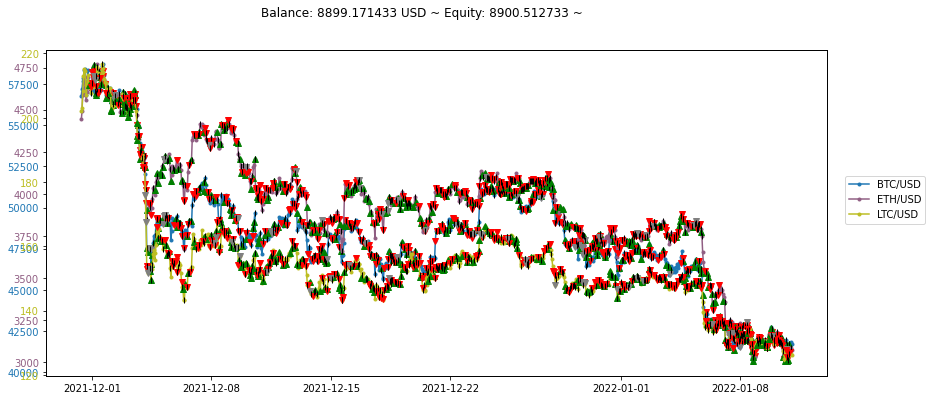

In [6]:
env.render('simple_figure')

In [26]:
state['orders'].Symbol.value_counts()

BTC/USD    470
LTC/USD    468
ETH/USD    454
Name: Symbol, dtype: int64

<AxesSubplot:>

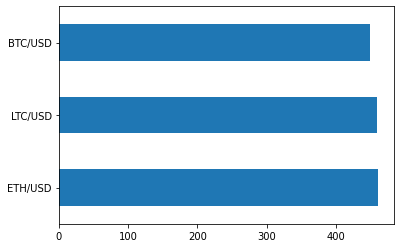

In [22]:
state['orders'].Symbol.value_counts().plot(kind='barh')

In [27]:
env.render('advanced_figure', time_format="%Y-%m-%d %H:%M:%S")

In [15]:
a = np.array(env.time_points)[[0,2,3]]

In [16]:
a

array([datetime.datetime(2021, 11, 30, 9, 0),
       datetime.datetime(2021, 11, 30, 11, 0),
       datetime.datetime(2021, 11, 30, 12, 0)], dtype=object)

In [8]:
env.time_points

[datetime.datetime(2021, 11, 30, 9, 0),
 datetime.datetime(2021, 11, 30, 10, 0),
 datetime.datetime(2021, 11, 30, 11, 0),
 datetime.datetime(2021, 11, 30, 12, 0),
 datetime.datetime(2021, 11, 30, 13, 0),
 datetime.datetime(2021, 11, 30, 14, 0),
 datetime.datetime(2021, 11, 30, 15, 0),
 datetime.datetime(2021, 11, 30, 16, 0),
 datetime.datetime(2021, 11, 30, 17, 0),
 datetime.datetime(2021, 11, 30, 18, 0),
 datetime.datetime(2021, 11, 30, 19, 0),
 datetime.datetime(2021, 11, 30, 20, 0),
 datetime.datetime(2021, 11, 30, 21, 0),
 datetime.datetime(2021, 11, 30, 22, 0),
 datetime.datetime(2021, 11, 30, 23, 0),
 datetime.datetime(2021, 12, 1, 0, 0),
 datetime.datetime(2021, 12, 1, 1, 0),
 datetime.datetime(2021, 12, 1, 2, 0),
 datetime.datetime(2021, 12, 1, 3, 0),
 datetime.datetime(2021, 12, 1, 4, 0),
 datetime.datetime(2021, 12, 1, 5, 0),
 datetime.datetime(2021, 12, 1, 6, 0),
 datetime.datetime(2021, 12, 1, 7, 0),
 datetime.datetime(2021, 12, 1, 8, 0),
 datetime.datetime(2021, 12, 1, 9, 

In [8]:
env.simulator.symbols_data['LTC/USD']

,open,high,low,close,volume
Time,,,,,
2021-11-30 09:00:00,201.39,202.61,200.23,202.04,6.896056e+05
2021-11-30 10:00:00,201.95,203.29,201.40,203.04,4.302309e+05
2021-11-30 11:00:00,203.09,212.41,202.22,208.36,1.425538e+06
2021-11-30 12:00:00,208.39,216.01,208.39,212.97,4.347828e+06
2021-11-30 13:00:00,213.07,215.46,211.96,215.19,6.157329e+05
...,...,...,...,...,...
2022-01-10 20:00:00,124.84,126.74,124.21,126.41,6.190597e+05
2022-01-10 21:00:00,126.48,126.87,126.03,126.79,2.798144e+05
2022-01-10 22:00:00,126.79,127.14,126.15,126.34,1.132973e+05


## A Complete Example using stable-baselines

In [4]:
import gym
from gym_mtsim import (
    SymbolInfo,
    MtSimulator, OrderType, Order, SymbolNotFound, OrderNotFound,
    MtEnv,
    FOREX_DATA_PATH, STOCKS_DATA_PATH, CRYPTO_DATA_PATH, MIXED_DATA_PATH,
)
from stable_baselines3 import A2C, PPO

ImportError: cannot import name 'Timeframe' from 'gym_mtsim' (C:\Users\ali.khankan\Desktop\Ali-gym-mtsim\gym_mtsim\__init__.py)

In [5]:
model = A2C('MultiInputPolicy', env, verbose=2)
model.learn(total_timesteps=10000)

observation = env.reset()
while True:
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)
    if done:
        break

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 263      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -21.4    |
|    explained_variance | 0.249    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -63.4    |
|    std                | 1.01     |
|    value_loss         | 8.84     |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 990       |
|    ep_rew_mean        | -1.14e+03 |
| time/                 |           |
|    fps                | 262       |
|    iterations         | 200       |
|    time_elapsed       | 3         |
|    total_timesteps    | 1000      |
| train/ 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 990      |
|    ep_rew_mean        | -529     |
| time/                 |          |
|    fps                | 305      |
|    iterations         | 1400     |
|    time_elapsed       | 22       |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -21.3    |
|    explained_variance | -41.1    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | 6.22     |
|    std                | 1        |
|    value_loss         | 0.117    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 990      |
|    ep_rew_mean        | -529     |
| time/                 |          |
|    fps                | 305      |
|    iterations         | 1500     |
|    time_elapsed       | 24       |
|    total_timesteps    | 7500     |
|

In [11]:
env.render('advanced_figure')

In [6]:
state = env.render()
orders = state['orders'].sort_values('Id')

In [7]:
orders[:100]

,Id,Symbol,Type,Amount,Leverage,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Fee,Closed
275,1,ETH/USD,Buy,0.17,136,2021-11-30 18:00:00,4695.673026,2021-11-30 19:00:00,4668.90,-0.131822,0.000222,True
274,2,BTC/USD,Sell,1.06,227,2021-11-30 19:00:00,57678.000000,2021-11-30 20:00:00,57477.00,0.754700,0.000695,True
273,3,ETH/USD,Sell,0.57,197,2021-11-30 20:00:00,4652.700000,2021-11-30 21:00:00,4630.70,0.477900,0.000148,True
268,4,LTC/USD,Buy,1.66,195,2021-11-30 20:00:00,210.100000,2021-11-30 23:00:00,207.84,-3.481970,0.017842,True
272,5,BTC/USD,Buy,1.80,100,2021-11-30 21:00:00,57167.000000,2021-11-30 22:00:00,57346.00,0.507300,0.000681,True
...,...,...,...,...,...,...,...,...,...,...,...,...
180,96,ETH/USD,Buy,1.48,196,2021-12-05 20:00:00,4142.196598,2021-12-05 23:00:00,4202.80,3.819700,0.000239,True
181,97,LTC/USD,Buy,1.33,148,2021-12-05 20:00:00,154.830000,2021-12-05 22:00:00,155.61,0.892500,0.016198,True
178,98,BTC/USD,Sell,0.77,180,2021-12-06 12:00:00,48554.000000,2021-12-06 15:00:00,49011.00,-1.304531,0.000731,True
177,99,BTC/USD,Sell,1.10,162,2021-12-06 18:00:00,49253.000000,2021-12-06 19:00:00,49175.00,0.254000,0.000700,True


In [8]:
orders[orders['Profit'] > 0]

,Id,Symbol,Type,Amount,Leverage,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Fee,Closed
274,2,BTC/USD,Sell,1.06,227,2021-11-30 19:00:00,57678.00,2021-11-30 20:00:00,57477.000000,0.7547,0.000695,True
273,3,ETH/USD,Sell,0.57,197,2021-11-30 20:00:00,4652.70,2021-11-30 21:00:00,4630.700000,0.4779,0.000148,True
272,5,BTC/USD,Buy,1.80,100,2021-11-30 21:00:00,57167.00,2021-11-30 22:00:00,57346.000000,0.5073,0.000681,True
270,7,LTC/USD,Buy,0.20,227,2021-11-30 21:00:00,209.25,2021-11-30 22:00:00,209.620000,0.0722,0.018158,True
269,8,BTC/USD,Sell,0.34,154,2021-11-30 22:00:00,57346.00,2021-11-30 23:00:00,56966.000000,0.3123,0.000681,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9,267,LTC/USD,Sell,1.22,104,2022-01-06 00:00:00,136.69,2022-01-06 02:00:00,134.880000,1.5121,0.022692,True
6,270,BTC/USD,Sell,1.08,261,2022-01-06 13:00:00,43143.00,2022-01-06 23:00:00,43103.471611,0.2324,0.000618,True
3,274,LTC/USD,Sell,1.86,100,2022-01-07 17:00:00,134.46,2022-01-07 19:00:00,133.420000,1.2948,0.015627,True
1,275,ETH/USD,Sell,0.03,248,2022-01-07 19:00:00,3196.00,2022-01-07 22:00:00,3181.900000,0.0295,0.000223,True


In [9]:
orders[orders['Closed']==False]

,Id,Symbol,Type,Amount,Leverage,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Fee,Closed
1,558,LTC/USD,Sell,0.71,59,2022-01-10 20:00:00,126.41,2022-01-11,126.15,0.0775,0.022187,False
0,559,ETH/USD,Sell,0.46,204,2022-01-10 23:00:00,3084.50,2022-01-11,3070.90,0.3724,0.000151,False


## Using Ray


In [5]:
from ray.tune.registry import register_env
from ray import tune

In [6]:
def create_env(config):
    sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=True,
    symbols_filename=ALI_DATA_PATH
    )

    env = MtEnv(
        original_simulator=sim,
        trading_symbols=['BTC/USD', 'ETH/USD', 'LTC/USD'],
        window_size=10,
        # time_points=[desired time points ...],
        hold_threshold=0.5,
        close_threshold=0.5,
        fee=lambda symbol: {
            'BTC/USD': max(0., np.random.normal(0.0007, 0.00005)),
            'ETH/USD': max(0., np.random.normal(0.0002, 0.00003)),
            'LTC/USD': max(0., np.random.normal(0.02, 0.003)),
        }[symbol],
        symbol_max_orders=2,
        multiprocessing_processes=0
    )
    return env

register_env("TradingEnv", create_env)

In [7]:
analysis = tune.run(
    "PPO",
    stop={
      #"episode_reward_mean": 150,
      "training_iteration": 30
    },
    config={
        "env": "TradingEnv",
        "env_config": {
            "window_size": 12
        },
        "log_level": "DEBUG",
        "framework": "torch",
        "ignore_worker_failures": True,
        "num_workers": 7,
        "num_gpus": 0,
        "clip_rewards": True,
        "lr": 8e-6,
        "lr_schedule": [
            [0, 1e-1],
            [int(1e2), 1e-2],
            [int(1e3), 1e-3],
            [int(1e4), 1e-4],
            [int(1e5), 1e-5],
            [int(1e6), 1e-6],
            [int(1e7), 1e-7]
        ],
        "model": {
            "use_lstm": True,
            "lstm_cell_size": 256
        },
        "gamma": 0,
        "observation_filter": "MeanStdFilter",
        "lambda": 0.72,
        "vf_loss_coeff": 0.5,
        "entropy_coeff": 0.01
    },
    checkpoint_at_end=True
)

2022-01-18 09:28:24,634	INFO resource_spec.py:223 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2022-01-18 09:28:25,723	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


Instructions for updating:
non-resource variables are not supported in the long term


2022-01-18 09:28:34,843	ERROR logger.py:196 -- pip install 'ray[tune]' to see TensorBoard files.
2022-01-18 09:28:34,844	WARNING logger.py:329 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
2022-01-18 09:28:34,847	ERROR syncer.py:46 -- Log sync requires rsync to be installed.


Trial name,status,loc
PPO_TradingEnv_7b399_00000,RUNNING,


(pid=10052) WARNING:tensorflow:From C:\Users\ali.khankan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\compat\v2_compat.py:101: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=10052) Instructions for updating:
(pid=10052) non-resource variables are not supported in the long term
(pid=10052) 2022-01-18 09:28:46,925	DEBUG rollout_worker.py:957 -- Creating policy for default_policy
(pid=10052) 2022-01-18 09:28:46,925	DEBUG preprocessors.py:225 -- Creating sub-preprocessor for Box([-inf], [inf], (1,), float32)
(pid=10052) 2022-01-18 09:28:46,926	DEBUG preprocessors.py:225 -- Creating sub-preprocessor for Box([-inf], [inf], (1,), float32)
(pid=10052) 2022-01-18 09:28:46,927	DEBUG preprocessors.py:225 -- Creating sub-preprocessor for Box([[-inf -inf -inf ... -inf -inf -inf]
(pid=10052)  [-inf -inf -inf ... -inf -inf -inf]
(pid=10052)  [-inf -inf -inf ... -inf -inf -inf]
(pid=10052)  ...
(pid=

(pid=14252) C:\Users\ali.khankan\AppData\Roaming\Python\Python38\site-packages\ray\rllib\utils\torch_ops.py:149: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
(pid=14252)   tensor = torch.from_numpy(np.asarray(item))
(pid=5852) 2022-01-18 09:29:16,916	DEBUG rollout_worker.py:957 -- Creating policy for default_policy
(pid=5852) 2022-01-18 09:29:16,923	DEBUG preprocessors.py:225 -- Creating sub-preprocessor for Box([-inf], [inf], (1,), float32)
(pid=5852) 2022-01-18 09:29:16,923	DEBUG preprocessors.py:225 -- Creating sub-preprocessor for Box([-inf], [inf], (1,), float32)
(pid=5852) 2022-01-1

(pid=2580) 2022-01-18 09:29:17,122	DEBUG rollout_worker.py:538 -- Created rollout worker with env <ray.rllib.env.base_env._VectorEnvToBaseEnv object at 0x0000021D27E2EDF0> (<MtEnv instance>), policies {'default_policy': <ray.rllib.policy.torch_policy_template.PPOTorchPolicy object at 0x0000021D27E2E160>}
(pid=2580) C:\Users\ali.khankan\AppData\Roaming\Python\Python38\site-packages\ray\rllib\utils\torch_ops.py:149: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
(pid=2580)   tensor = torch.from_numpy(np.asarray(item))
(pid=20008) C:\Users\ali.khankan\AppData\Roaming\Python\Python38\site-packa

(pid=652) 2022-01-18 09:29:19,443	INFO sample_batch_builder.py:202 -- Trajectory fragment after postprocess_trajectory():
(pid=652) 
(pid=652) { 'agent0': { 'data': { 'action_dist_inputs': np.ndarray((200, 30), dtype=float32, min=-0.566, max=0.763, mean=-0.01),
(pid=652)                         'action_logp': np.ndarray((200,), dtype=float32, min=-31.795, max=-16.353, mean=-21.735),
(pid=652)                         'action_prob': np.ndarray((200,), dtype=float32, min=0.0, max=0.0, mean=0.0),
(pid=652)                         'actions': np.ndarray((200, 15), dtype=float32, min=-5.22, max=4.433, mean=-0.049),
(pid=652)                         'advantages': np.ndarray((200,), dtype=float32, min=-1.372, max=1.202, mean=-0.541),
(pid=652)                         'agent_index': np.ndarray((200,), dtype=int32, min=0.0, max=0.0, mean=0.0),
(pid=652)                         'dones': np.ndarray((200,), dtype=bool, min=0.0, max=0.0, mean=0.0),
(pid=652)                         'eps_id': np.ndarr

(pid=10052) 2022-01-18 09:29:27,822	DEBUG sgd.py:120 -- 0 {'allreduce_latency': 0.0, 'cur_kl_coeff': 0.2, 'cur_lr': 8e-06, 'total_loss': 0.2551684407235095, 'policy_loss': -0.0026173869599447107, 'vf_loss': 0.9338401917255286, 'vf_explained_var': -0.014837854, 'kl': 0.013802703999597274, 'entropy': 21.18948069485751, 'entropy_coeff': 0.01}
2022-01-18 09:29:31,573	ERROR trial_runner.py:523 -- Trial PPO_TradingEnv_7b399_00000: Error processing event.
Traceback (most recent call last):
  File "C:\Users\ali.khankan\AppData\Roaming\Python\Python38\site-packages\ray\tune\trial_runner.py", line 471, in _process_trial
    result = self.trial_executor.fetch_result(trial)
  File "C:\Users\ali.khankan\AppData\Roaming\Python\Python38\site-packages\ray\tune\ray_trial_executor.py", line 430, in fetch_result
    result = ray.get(trial_future[0], DEFAULT_GET_TIMEOUT)
  File "C:\Users\ali.khankan\AppData\Roaming\Python\Python38\site-packages\ray\worker.py", line 1538, in get
    raise value.as_instance

Trial name,status,loc
PPO_TradingEnv_7b399_00000,ERROR,
Trial name,# failures,error file
PPO_TradingEnv_7b399_00000,1,C:\Users\ali.khankan\ray_results\PPO\PPO_TradingEnv_0_2022-01-18_09-28-349blz8joc\error.txt


Trial name,status,loc
PPO_TradingEnv_7b399_00000,ERROR,
Trial name,# failures,error file
PPO_TradingEnv_7b399_00000,1,C:\Users\ali.khankan\ray_results\PPO\PPO_TradingEnv_0_2022-01-18_09-28-349blz8joc\error.txt


TuneError: ('Trials did not complete', [PPO_TradingEnv_7b399_00000])

In [7]:
import ray.rllib.agents.ppo as ppo

# Get checkpoint
checkpoints = analysis.get_trial_checkpoints_paths(
    trial=analysis.get_best_trial("episode_reward_mean"),
    metric="episode_reward_mean"
)
checkpoint_path = checkpoints[0][0]

# Restore agent
agent = ppo.PPOTrainer(
    env="TradingEnv",
    config={
        "env_config": {
            "window_size": 12
        },
        "framework": "torch",
        "log_level": "DEBUG",
        "ignore_worker_failures": True,
        "num_workers": 1,
        "num_gpus": 1,
        "clip_rewards": True,
        "lr": 8e-6,
        "lr_schedule": [
            [0, 1e-1],
            [int(1e2), 1e-2],
            [int(1e3), 1e-3],
            [int(1e4), 1e-4],
            [int(1e5), 1e-5],
            [int(1e6), 1e-6],
            [int(1e7), 1e-7]
        ],
        "model": {
            "use_lstm": True,
            "lstm_cell_size": 256
        },
        "gamma": 0,
        "observation_filter": "MeanStdFilter",
        "lambda": 0.72,
        "vf_loss_coeff": 0.5,
        "entropy_coeff": 0.01
    }
)
agent.restore(checkpoint_path)

NameError: name 'analysis' is not defined

In [16]:
# Instantiate the environment
env = create_env({
    "window_size": 12,
})

# Run until episode ends
done = False
obs = env.reset()
# Initialize hidden_state variable that will correspond to lstm_cell_size
hidden_state = [np.zeros(256), np.zeros(256)]

i = 0
while not done:
    # In order for use_lstm to work we set full_fetch to True
    # This changes the output of compute action to a tuple (action, hidden_state, info)
    # We also pass in the previous hidden state in order for the model to use correctly use the LSTM
    action, hidden_state, _ = agent.compute_action(obs, state=hidden_state, full_fetch=True)
    obs, reward, done, info = env.step(action)

state = env.render()

In [17]:
state['orders']

,Id,Symbol,Type,Amount,Leverage,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Fee,Closed
0,526,LTC/USD,Sell,0.31,172,2022-01-10 23:00:00,126.55,2022-01-11 00:00:00,126.15,0.151700,0.020808,False
1,525,BTC/USD,Buy,0.31,94,2022-01-10 21:00:00,41732.00,2022-01-11 00:00:00,41733.00,0.000600,0.000746,False
2,524,ETH/USD,Buy,0.10,22,2022-01-10 10:00:00,3138.60,2022-01-10 12:00:00,3033.10,-0.073950,0.000222,True
3,523,ETH/USD,Buy,0.45,113,2022-01-10 06:00:00,3163.00,2022-01-10 07:00:00,3164.30,0.018800,0.000195,True
4,522,LTC/USD,Sell,0.10,104,2022-01-10 02:00:00,130.11,2022-01-10 05:00:00,130.90,-0.063147,0.019253,True
...,...,...,...,...,...,...,...,...,...,...,...,...
521,5,BTC/USD,Sell,1.78,91,2021-11-30 21:00:00,57167.00,2021-11-30 23:00:00,56966.00,0.512600,0.000722,True
522,3,LTC/USD,Sell,1.87,94,2021-11-30 19:00:00,211.50,2021-11-30 21:00:00,209.25,1.683000,0.022390,True
523,4,ETH/USD,Buy,0.21,79,2021-11-30 20:00:00,4652.70,2021-11-30 21:00:00,4630.70,-0.078445,0.000213,True
524,2,BTC/USD,Buy,0.37,181,2021-11-30 19:00:00,57678.00,2021-11-30 21:00:00,57167.00,-0.593323,0.000724,True


In [18]:
print(f"balance: {state['balance']}, equity: {state['equity']}")


balance: 9692.535331631709, equity: 9692.687631631708


In [20]:
state['orders'][state['orders']['Amount'] > 5]

,Id,Symbol,Type,Amount,Leverage,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Fee,Closed
65,460,ETH/USD,Buy,5.31,118,2022-01-01 02:00:00,3728.5,2022-01-01 04:00:00,3708.6,-3.344225,0.000224,True


In [10]:
sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=True,
    symbols_filename=FOREX_DATA_PATH
)

sim.current_time = datetime(2021, 8, 30, 0, 17, 52, tzinfo=pytz.UTC)

order1 = sim.create_order(
    order_type=OrderType.Buy,
    symbol='GBPCAD',
    volume=1.,
    fee=0.0003,
)
state = sim.get_state()

# if not sim.load_symbols(FOREX_DATA_PATH):
#     sim.download_data(
#         symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
#         time_range=(
#             datetime(2021, 5, 5, tzinfo=pytz.UTC),
#             datetime(2021, 9, 5, tzinfo=pytz.UTC)
#         ),
#         timeframe=Timeframe.D1
#     )
#     sim.save_symbols(FOREX_DATA_PATH)

In [32]:
type(sim.symbols_data['BTC/USD'].values)

SyntaxError: unexpected EOF while parsing (<ipython-input-32-0126c8557f23>, line 1)

In [4]:
print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 10000.0, equity: 9976.201242295152, margin: 1375.480933228619
free_margin: 8600.720309066533, margin_level: 7.252882248637577



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,1,GBPCAD,Buy,1.0,2021-08-30 00:17:52+00:00,1.73389,2021-08-30 00:17:52+00:00,1.73389,-23.798758,1375.480933,0.0003,False


In [12]:
env = MtEnv(
    original_simulator=sim,
    trading_symbols=['GBPCAD', 'EURUSD', 'USDJPY'],
    window_size=10,
    # time_points=[desired time points ...],
    hold_threshold=0.5,
    close_threshold=0.5,
    fee=lambda symbol: {
        'GBPCAD': max(0., np.random.normal(0.0007, 0.00005)),
        'EURUSD': max(0., np.random.normal(0.0002, 0.00003)),
        'USDJPY': max(0., np.random.normal(0.02, 0.003)),
    }[symbol],
    symbol_max_orders=2,
    multiprocessing_processes=0
)

KeyError: "None of [Index(['close', 'open'], dtype='object')] are in the [index]"

In [6]:
print("env information:")

for symbol in env.prices:
    print(f"> prices[{symbol}].shape:", env.prices[symbol].shape)

print("> signal_features.shape:", env.signal_features.shape)
print("> features_shape:", env.features_shape)

env information:
> prices[GBPCAD].shape: (88, 2)
> prices[EURUSD].shape: (88, 2)
> prices[USDJPY].shape: (88, 2)
> signal_features.shape: (88, 6)
> features_shape: (10, 6)


In [16]:
env.signal_features

array([[  1.70525,   1.70858,   1.20036,   1.20118, 109.188  , 109.323  ],
       [  1.68648,   1.70525,   1.20646,   1.20036, 109.09   , 109.188  ],
       [  1.69619,   1.68649,   1.21618,   1.20647, 108.604  , 109.089  ],
       [  1.70707,   1.69653,   1.21282,   1.216  , 108.81   , 108.545  ],
       [  1.71108,   1.70707,   1.2147 ,   1.2128 , 108.615  , 108.792  ],
       [  1.70468,   1.71118,   1.20705,   1.21472, 109.699  , 108.609  ],
       [  1.70829,   1.70474,   1.20791,   1.20724, 109.453  , 109.664  ],
       [  1.70635,   1.70828,   1.21441,   1.20787, 109.362  , 109.448  ],
       [  1.70592,   1.70545,   1.21511,   1.21323, 109.209  , 109.254  ],
       [  1.71128,   1.70478,   1.22219,   1.21513, 108.888  , 109.209  ],
       [  1.71211,   1.71053,   1.21744,   1.22219, 109.227  , 108.895  ],
       [  1.7107 ,   1.71218,   1.22269,   1.21744, 108.767  , 109.218  ],
       [  1.70726,   1.71108,   1.21806,   1.2227 , 108.945  , 108.773  ],
       [  1.7044 ,   1.70

In [4]:
env.prices

{'BTC/USD': array([[56791.03774067, 56851.        ],
        [57221.        , 56788.        ],
        [57660.        , 57225.        ],
        ...,
        [41613.        , 41732.        ],
        [41847.        , 41621.        ],
        [41733.        , 41839.        ]]),
 'ETH/USD': array([[4442.9, 4428.3],
        [4491.6, 4442.4],
        [4597.3, 4491.9],
        ...,
        [3063.5, 3076.7],
        [3084.5, 3063.5],
        [3070.9, 3084.7]]),
 'LTC/USD': array([[202.04, 201.39],
        [203.04, 201.95],
        [208.36, 203.09],
        ...,
        [126.34, 126.79],
        [126.55, 126.36],
        [126.15, 126.5 ]])}

In [5]:
data = env.prices
signal_features = np.column_stack(list(data.values()))

In [30]:
data.values()

dict_values([array([[56791.03774067, 56851.        ],
       [57221.        , 56788.        ],
       [57660.        , 57225.        ],
       ...,
       [41613.        , 41732.        ],
       [41847.        , 41621.        ],
       [41733.        , 41839.        ]]), array([[4442.9, 4428.3],
       [4491.6, 4442.4],
       [4597.3, 4491.9],
       ...,
       [3063.5, 3076.7],
       [3084.5, 3063.5],
       [3070.9, 3084.7]]), array([[202.04, 201.39],
       [203.04, 201.95],
       [208.36, 203.09],
       ...,
       [126.34, 126.79],
       [126.55, 126.36],
       [126.15, 126.5 ]])])

In [13]:
env.prices['BTC/USD'].shape

(1000, 2)

In [7]:
signal_features.shape

(1000, 6)

In [20]:
test = np.zeros((3,2,3))

In [22]:
test[0,0] = [1,1,1]

In [25]:
test[1,1] = [2,2,2]

In [26]:
test

array([[[1., 1., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [2., 2., 2.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [8]:
env.signal_features

array([[  1.70525,   1.70858,   1.20036,   1.20118, 109.188  , 109.323  ],
       [  1.68648,   1.70525,   1.20646,   1.20036, 109.09   , 109.188  ],
       [  1.69619,   1.68649,   1.21618,   1.20647, 108.604  , 109.089  ],
       [  1.70707,   1.69653,   1.21282,   1.216  , 108.81   , 108.545  ],
       [  1.71108,   1.70707,   1.2147 ,   1.2128 , 108.615  , 108.792  ],
       [  1.70468,   1.71118,   1.20705,   1.21472, 109.699  , 108.609  ],
       [  1.70829,   1.70474,   1.20791,   1.20724, 109.453  , 109.664  ],
       [  1.70635,   1.70828,   1.21441,   1.20787, 109.362  , 109.448  ],
       [  1.70592,   1.70545,   1.21511,   1.21323, 109.209  , 109.254  ],
       [  1.71128,   1.70478,   1.22219,   1.21513, 108.888  , 109.209  ],
       [  1.71211,   1.71053,   1.21744,   1.22219, 109.227  , 108.895  ],
       [  1.7107 ,   1.71218,   1.22269,   1.21744, 108.767  , 109.218  ],
       [  1.70726,   1.71108,   1.21806,   1.2227 , 108.945  , 108.773  ],
       [  1.7044 ,   1.70

In [11]:
data

{'GBPCAD': array([[1.70525, 1.70858],
        [1.68648, 1.70525],
        [1.69619, 1.68649],
        [1.70707, 1.69653],
        [1.71108, 1.70707],
        [1.70468, 1.71118],
        [1.70829, 1.70474],
        [1.70635, 1.70828],
        [1.70592, 1.70545],
        [1.71128, 1.70478],
        [1.71211, 1.71053],
        [1.7107 , 1.71218],
        [1.70726, 1.71108],
        [1.7044 , 1.70369],
        [1.7066 , 1.70467],
        [1.71089, 1.70662],
        [1.71345, 1.71073],
        [1.71356, 1.71345],
        [1.71324, 1.71076],
        [1.70755, 1.71348],
        [1.70462, 1.70725],
        [1.70684, 1.70463],
        [1.70999, 1.70677],
        [1.71255, 1.7079 ],
        [1.71392, 1.71254],
        [1.70927, 1.71365],
        [1.71433, 1.70913],
        [1.71691, 1.71431],
        [1.71341, 1.71251],
        [1.71492, 1.71305],
        [1.71638, 1.71503],
        [1.71949, 1.71641],
        [1.72017, 1.71949],
        [1.72173, 1.71522],
        [1.71581, 1.72184],
        [1

In [15]:
env.signal_features.shape

(88, 6)

## Create 2 new orders

In [5]:
sim.current_time = datetime(2021, 8, 30, 0, 17, 52, tzinfo=pytz.UTC)

order1 = sim.create_order(
    order_type=OrderType.Buy,
    symbol='GBPCAD',
    volume=1.,
    fee=0.0003,
)

# sim.tick(timedelta(days=2))

# order2 = sim.create_order(
#     order_type=OrderType.Sell,
#     symbol='USDJPY',
#     volume=2.,
#     fee=0.01,
# )

#sim.tick(timedelta(days=5))

state = sim.get_state()

print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

Entered _create_hedged_order
balance: 10000.0, equity: 9976.201242295152, margin: 1375.480933228619
free_margin: 8600.720309066533, margin_level: 7.252882248637577



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,1,GBPCAD,Buy,1.0,2021-08-30 00:17:52+00:00,1.73389,2021-08-30 00:17:52+00:00,1.73389,-23.798758,1375.480933,0.0003,False


In [4]:
state['orders']

,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,2,USDJPY,Sell,2.0,2021-09-01 00:17:52+00:00,110.02500,2021-09-06 00:17:52+00:00,109.71200,552.355257,2000.000000,0.0100,False
1,1,GBPCAD,Buy,1.0,2021-08-30 00:17:52+00:00,1.73389,2021-09-06 00:17:52+00:00,1.73626,165.225928,1375.480933,0.0003,False


## Close orders

In [4]:
order1_profit = sim.close_order(order1)
order2_profit = sim.close_order(order2)

In [5]:
state = sim.get_state()

print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 10717.58118589908, equity: 10717.58118589908, margin: 0.0
free_margin: 10717.58118589908, margin_level: inf



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,2,USDJPY,Sell,2.0,2021-09-01 00:17:52+00:00,110.02500,2021-09-06 00:17:52+00:00,109.71200,552.355257,2000.000000,0.0100,True
1,1,GBPCAD,Buy,1.0,2021-08-30 00:17:52+00:00,1.73389,2021-09-06 00:17:52+00:00,1.73626,165.225928,1375.480933,0.0003,True


## deal with the pickle file

In [11]:
import pickle
filename = 'C:\\Users\\ali.khankan\\Desktop\\gym-mtsim\\gym_mtsim\\data\\symbols_forex.pkl'

In [15]:
with open(filename, 'rb') as file:
            symbols_info, symbols_data = pickle.load(file)

In [16]:
symbols_data['USDCAD']

,Open,Close,Low,High,Volume
Time,,,,,
2021-05-05 00:00:00+00:00,1.23039,1.22656,1.22517,1.23111,36285
2021-05-06 00:00:00+00:00,1.22650,1.21468,1.21417,1.22880,42320
2021-05-07 00:00:00+00:00,1.21466,1.21275,1.21255,1.21933,46082
2021-05-10 00:00:00+00:00,1.21201,1.20988,1.20786,1.21345,41535
2021-05-11 00:00:00+00:00,1.20990,1.21008,1.20782,1.21258,52994
...,...,...,...,...,...
2021-08-30 00:00:00+00:00,1.26101,1.26057,1.25735,1.26341,38360
2021-08-31 00:00:00+00:00,1.26037,1.26149,1.25693,1.26534,58318
2021-09-01 00:00:00+00:00,1.26137,1.26185,1.25802,1.26369,54389


In [10]:
for key in symbols_info:
    print (key)
    print (symbols_info[key])


EURUSD
Forex:EURUSD
GBPCAD
Forex:GBPCAD
GBPUSD
Forex:GBPUSD
USDCAD
Forex:USDCAD
USDCHF
Forex:USDCHF
GBPJPY
Forex:GBPJPY
USDJPY
Forex:USDJPY


In [18]:
symbols_info['EURUSD'].currency_margin

'EUR'

In [14]:
strr= 'EUR/USD'

print (strr.split('/')[1])

USD
